In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def plotLearningCurve(history):
    history_dict = history.history
    #history_dict.keys()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # plot loss
    plt.plot(epochs, loss_values, 'bo', label="loss")
    plt.plot(epochs, val_loss_values, 'b+', label="val loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    #plot accuracy
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, 'bo', label="acc")
    plt.plot(epochs, val_acc_values, 'b+', label="val acc")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
    
    
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

data = train.as_matrix()
X_test = test.as_matrix()
X = data[:,1:]
Y = data[:,0]
print(list(map(np.shape, [X, Y, X_test])))

x_train, x_val, y_train, y_val = train_test_split(X,
                                                  Y,
                                                  train_size=0.95,
                                                  test_size=0.05,
                                                  random_state=37)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

Using Theano backend.


[(42000, 784), (42000,), (28000, 784)]
x_train shape: (39900, 784)
x_val shape: (2100, 784)
39900 train samples
2100 test samples


# Base Model A

In [2]:
#sgd = SGD(lr=0.01)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [3]:
batch_size = 128
epochs = 50
baseModelA = Sequential()
baseModelA.add(Dense(16, activation='relu', input_dim=(28*28)))
baseModelA.add(Dense(16, activation='relu'))
baseModelA.add(Dense(10, activation='softmax'))

baseModelA.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [4]:
batch_size = 128
epochs = 50
baseModelA_dropout = Sequential()
baseModelA_dropout.add(Dense(16, activation='relu', input_dim=(28*28)))
baseModelA_dropout.add(Dropout(0.5))
baseModelA_dropout.add(Dense(16, activation='relu'))
baseModelA_dropout.add(Dense(10, activation='softmax'))

baseModelA_dropout.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [5]:
history = baseModelA.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_val, y_val))
history_dropout = baseModelA_dropout.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_val, y_val))

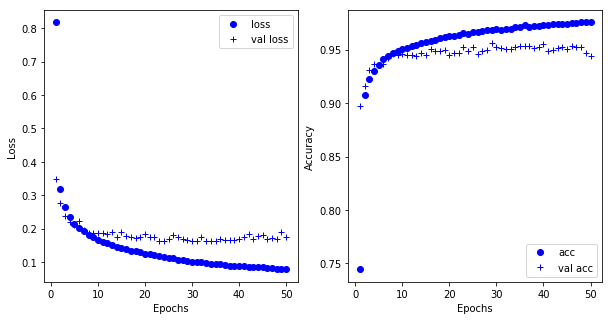

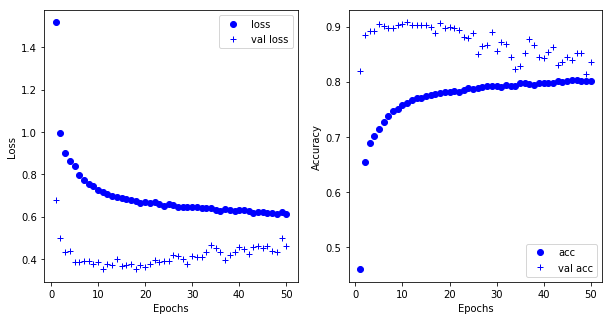

In [6]:
plotLearningCurve(history)
plotLearningCurve(history_dropout)

# Another Base Model

In [15]:
#sgd = SGD(lr=0.01)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [16]:
#model without dropout
batch_size = 128
epochs = 50
baseModelB = Sequential()
baseModelB.add(Dense(32, activation='relu', input_dim=(28*28)))
baseModelB.add(Dense(10, activation='softmax'))

baseModelB.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [17]:
#model without dropout
batch_size = 128
epochs = 50
baseModelB_dropout = Sequential()
baseModelB_dropout.add(Dense(32, activation='relu', input_dim=(28*28)))
baseModelB_dropout.add(Dropout(0.5))
baseModelB_dropout.add(Dense(10, activation='softmax'))

baseModelB_dropout.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [18]:
history = baseModelB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_val, y_val))
history_dropout = baseModelB_dropout.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_val, y_val))

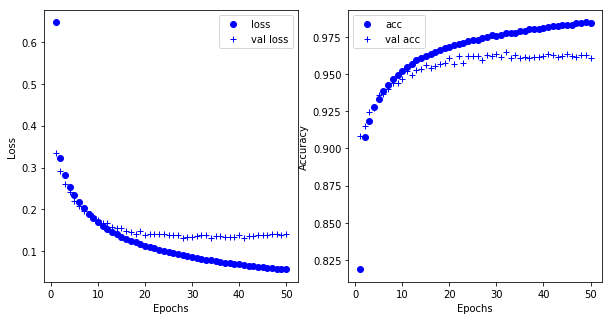

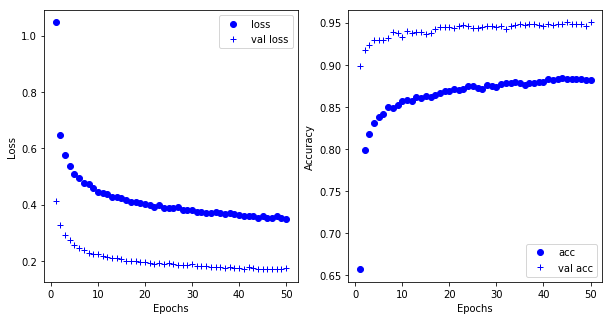

In [19]:
plotLearningCurve(history)
plotLearningCurve(history_dropout)